In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [6]:
data = pd.read_csv("./survey.csv")


In [7]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [9]:
data.shape

(1259, 27)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

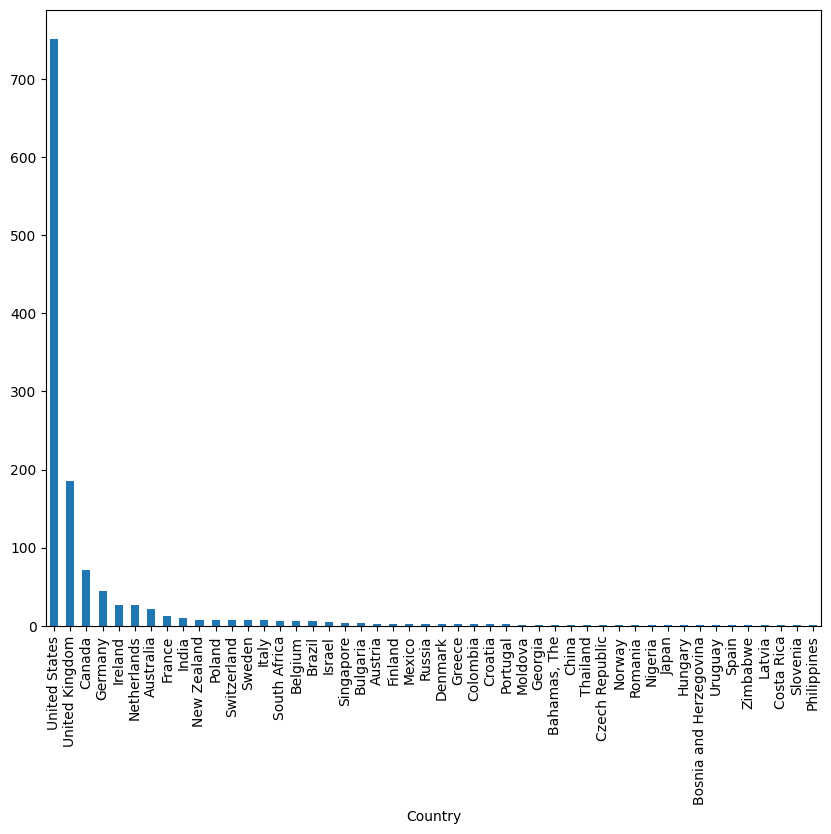

In [11]:
#Pre-Processing the Data
 
data['Country'].value_counts().plot(kind='bar', figsize=(10,8))

In [12]:
#Removing some columns as there informnation are not so relevalent.
data.drop(['Country','state', 'Timestamp', 'comments'], axis = 1, inplace=True)

In [13]:
#To check the null functions
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [14]:
# self_employed, work_interfere have null values.
#so we have to free the data set from null value [We are using fill NA function for this.]
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [15]:
data['self_employed'].fillna('No',inplace=True)
#data['self_employed'].value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18988\65250589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['self_employed'].fillna('No',inplace=True)


In [16]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [17]:
data['work_interfere'].fillna('N/A',inplace=True)
#data['work_interfere'].value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18988\2775088129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['work_interfere'].fillna('N/A',inplace=True)


<Axes: xlabel='Age'>

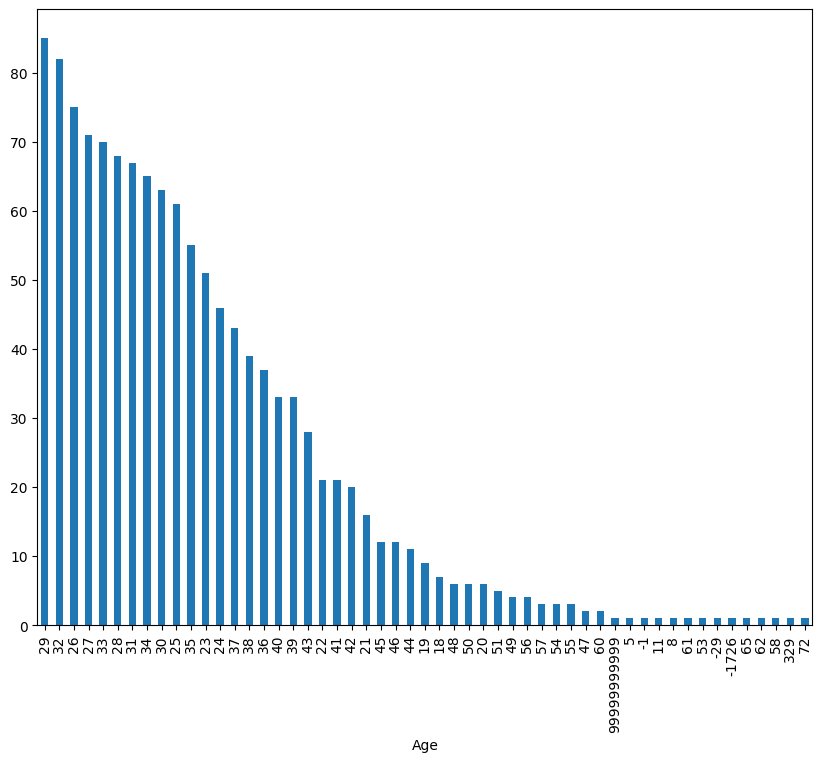

In [18]:
data['Age'].value_counts().plot(kind='bar', figsize=(10,8))

In [19]:
#In age/data-set there are some impractical entries are present so we have to remove thems.
#Lets remove the rows with impractical entries
data.drop(data[(data['Age']>60) | (data['Age']<18)] .index, inplace=True)

<Axes: xlabel='Gender'>

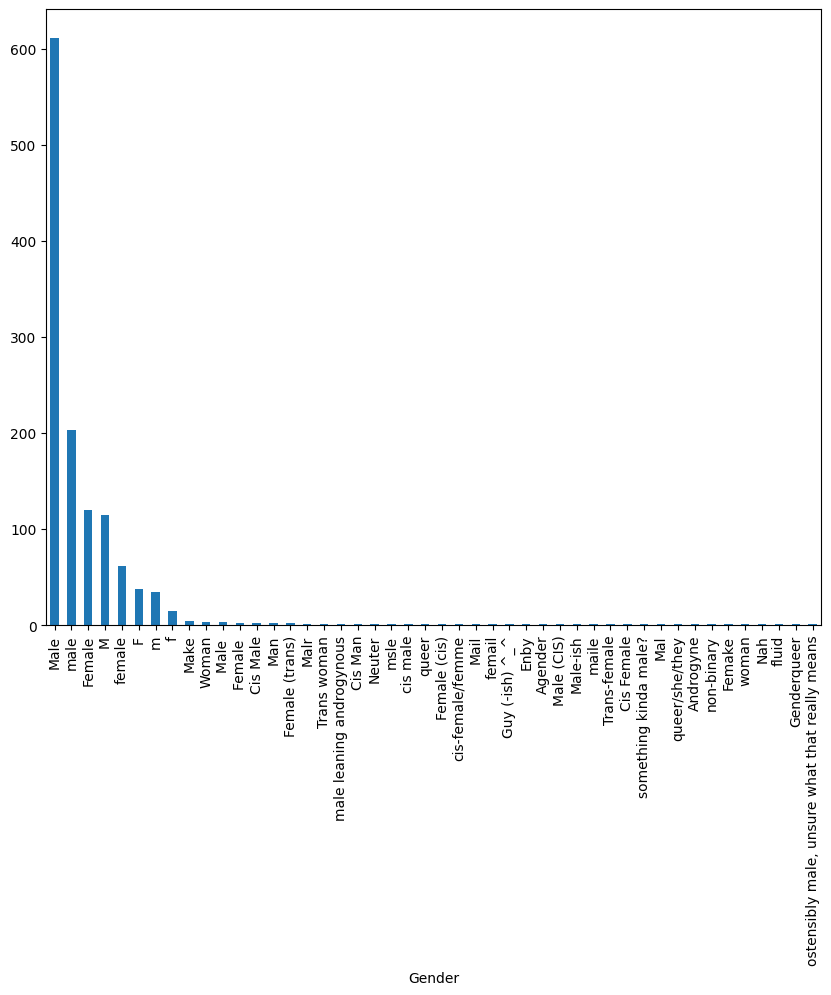

In [20]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [21]:
#Here also we have to Group the gender in mainly 3 category.
# 1.Male, 2.Female, 3.Non-Binary

data['Gender'].replace([ 'Male', 'male', 'M', 'm', 'Male ',
                        'Cis Male', 'Man', 'cis male', 'Mail',
                        'Male-ish', 'Male (CIS)', 'Cis Man',
                        'msle', 'Malr', 'Mal', 'maile', 'Make', ], 'Male', inplace = True)

data['Gender'].replace([ 'Female ', 'female', 'F', 'f', 'Woman', 
                        'Female', 'femail', 'Cis Female', 'cis-female/femme', 
                        'Femake', 'Female (cis)', 'woman', ], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 
                        'male leaning androgynous', 'Agender', 'A little about you',
                        'Nah', 'All', 'ostensibly male, unsure what that really means',
                        'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 
                        'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

#After making 3 category it looks like
data['Gender'].value_counts()
#New Plot for Gender 
#data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18988\20829814.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace([ 'Male', 'male', 'M', 'm', 'Male ',


Gender
Male          983
Female        246
Non-Binary     18
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18988\600915295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


Text(0.5, 1.0, 'Distribution - Age')

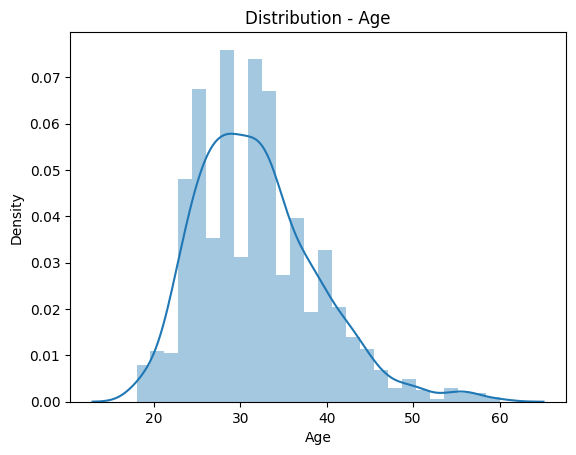

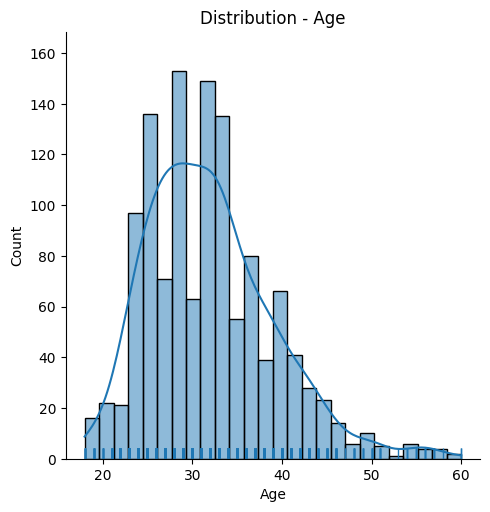

In [22]:
#Data Analysis and Visulization
sns.distplot(data["Age"])
#Provides distribution of specific features in our data set
plt.title("Distribution - Age")
plt.xlabel("Age") 
sns.displot(data["Age"],kde=True,rug=True) #  {we can use displot aslo as per Warning `distplot` is a deprecated function and will be removed in seaborn v0.14.0. }
plt.title("Distribution - Age")




Text(0.5, 1.0, 'Employment Type')

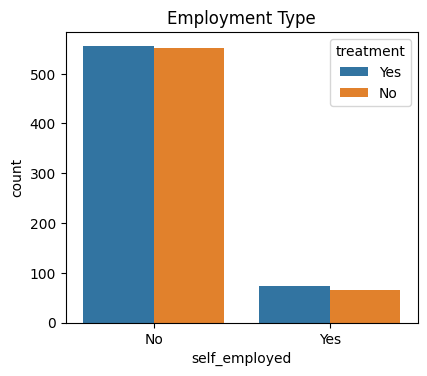

In [23]:
plt.figure(figsize=(10,40)) 
plt.subplot(9,2,1)
sns.countplot(data=data, x="self_employed", hue="treatment")
plt.title('Employment Type')

Text(0.5, 1.0, 'Family_History')

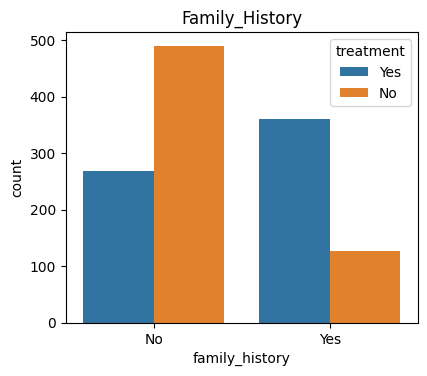

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(data=data, x="family_history", hue="treatment")
plt.title('Family_History')

Text(0.5, 1.0, 'Work Interfere')

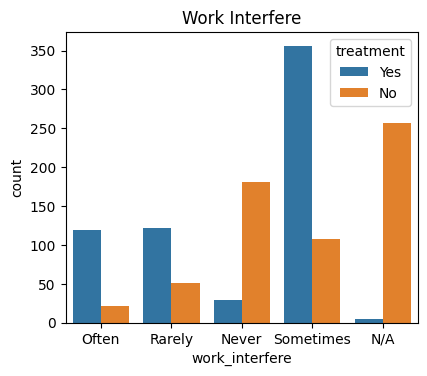

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sns.countplot(data=data, x="work_interfere", hue="treatment")
plt.title('Work Interfere') 


Text(0.5, 1.0, 'Work Type')

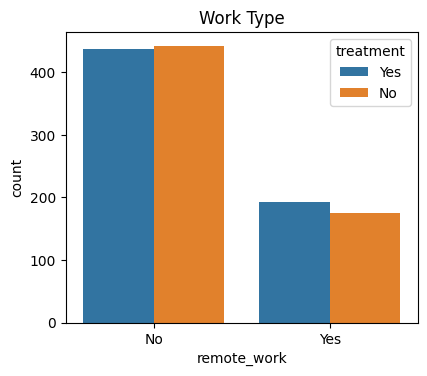

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sns.countplot(data=data, x="remote_work", hue="treatment")
plt.title('Work Type')

Text(0.5, 1.0, 'Company')

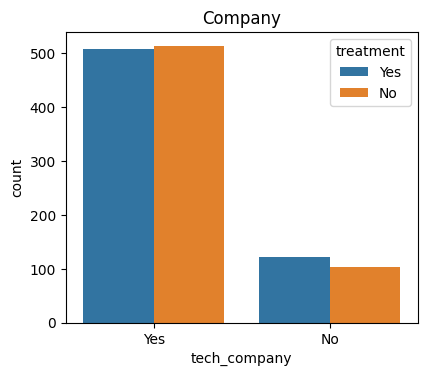

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sns.countplot(data=data, x="tech_company", hue="treatment")
plt.title("Company")

Text(0.5, 1.0, 'Benefits')

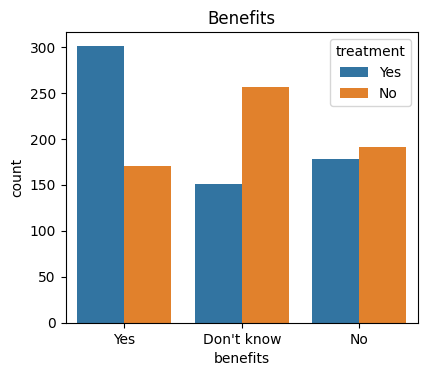

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sns.countplot(data=data, x="benefits", hue="treatment")
plt.title('Benefits')

Text(0.5, 1.0, 'Care Options')

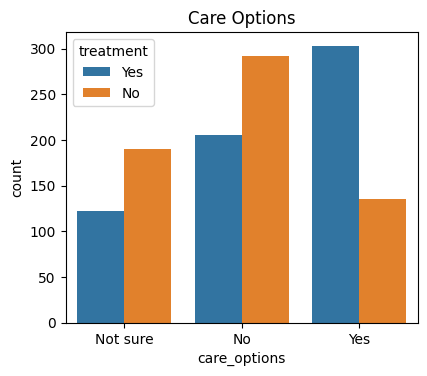

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sns.countplot(data=data, x="care_options", hue="treatment")
plt.title('Care Options')


Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

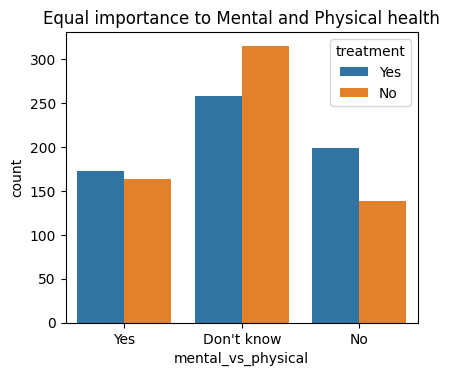

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sns.countplot(data=data, x="mental_vs_physical", hue="treatment")
plt.title('Equal importance to Mental and Physical health')

Text(0.5, 1.0, 'Wellness Program')

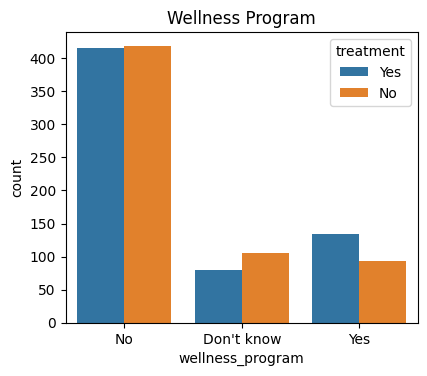

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sns.countplot(data=data, x="wellness_program", hue="treatment")
plt.title('Wellness Program')

Text(0.5, 1.0, 'Anonymity')

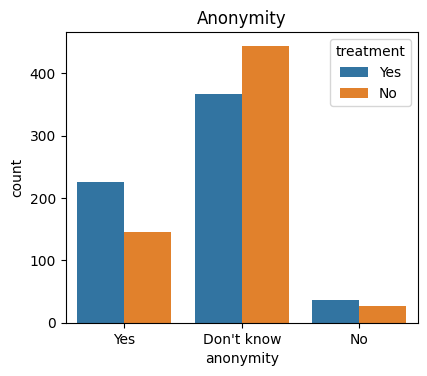

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sns.countplot(data=data, x="anonymity", hue="treatment")
plt.title('Anonymity')


Text(0.5, 1.0, 'Leave')

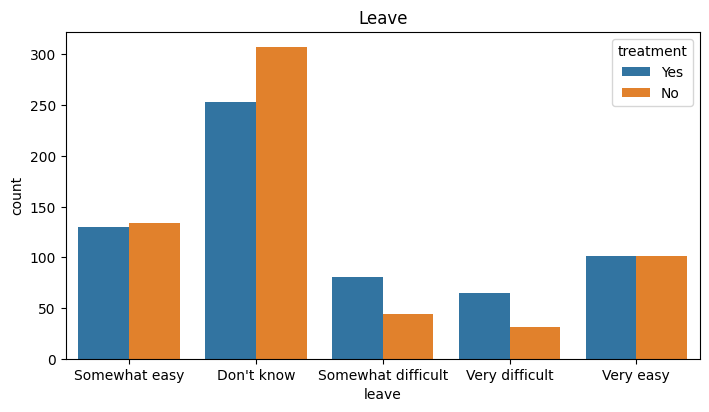

In [33]:
plt.figure(figsize=(18,45)) 
plt.subplot(9,2,11)
sns.countplot(data=data, x="leave", hue="treatment")
plt.title('Leave')

Text(0.5, 1.0, 'Mental Health Consequence')

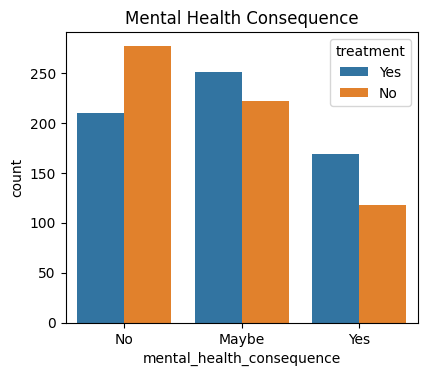

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sns.countplot(data=data, x="mental_health_consequence", hue="treatment")
plt.title('Mental Health Consequence')

Text(0.5, 1.0, 'Physical Health Consequence')

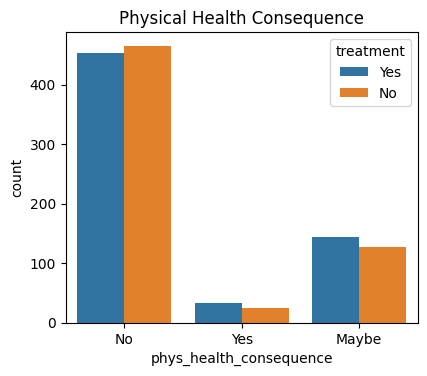

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sns.countplot(data=data, x="phys_health_consequence", hue="treatment")
plt.title('Physical Health Consequence')

Text(0.5, 1.0, 'Discussion with Coworkers')

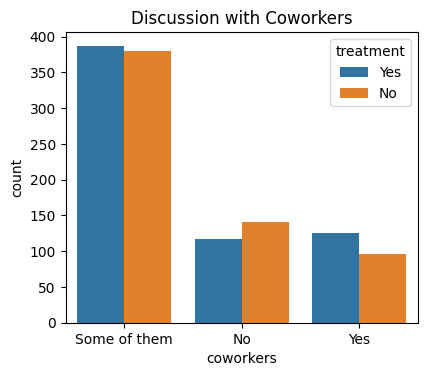

In [36]:
plt.figure(figsize=(10,40)) 
plt.subplot(9,2,14)
sns.countplot(data=data, x="coworkers", hue="treatment")
plt.title('Discussion with Coworkers')

Text(0.5, 1.0, 'Discussion With Supervisor')

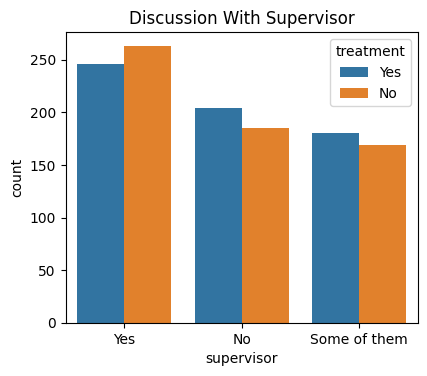

In [37]:
plt.figure(figsize=(10,40)) 
plt.subplot(9,2,15)
sns.countplot(data=data, x="supervisor", hue="treatment")
plt.title('Discussion With Supervisor')


Text(0.5, 1.0, 'Discussion With Interviewer')

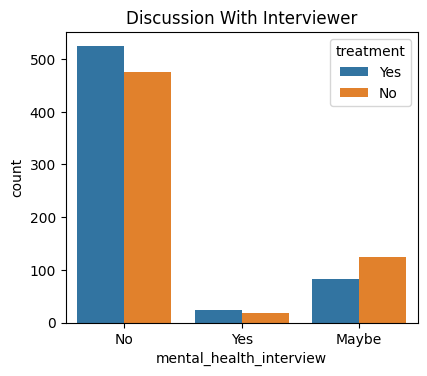

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sns.countplot(data=data, x="mental_health_interview", hue="treatment")
plt.title('Discussion With Interviewer')

Text(0.5, 1.0, 'Discussion With Interviewer')

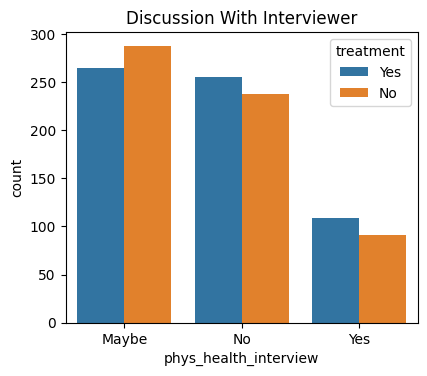

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sns.countplot(data=data, x="phys_health_interview", hue="treatment")
plt.title('Discussion With Interviewer')

Text(0.5, 1.0, 'Consequence After Disclosure')

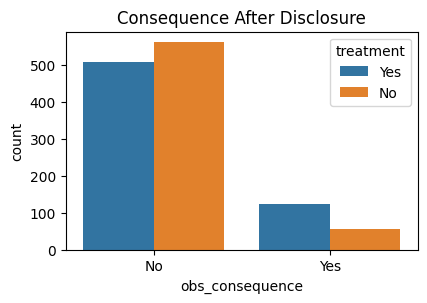

In [40]:
plt.figure(figsize=(10,30))
plt.subplot(9,2,18)
sns.countplot(data=data, x="obs_consequence", hue="treatment")
plt.title('Consequence After Disclosure')

In [41]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X = data.drop('treatment', axis = 1)
y = data[ 'treatment']

In [43]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder 

In [44]:
X = data.drop('treatment', axis= 1)
y = data['treatment']

In [45]:
ct = ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history', 
                                                    'work_interfere', 'no_employees', 'remote_work',
                                                    'tech_company', 'benefits', 'care_options', 
                                                    'wellness_program', 'seek_help', 'anonymity',
                                                    'leave', 'mental_health_consequence',
                                                    'phys_health_consequence', 'coworkers', 'supervisor',
                                                    'mental_health_interview', 'phys_health_interview',
                                                    'mental_vs_physical', 'obs_consequence' ])],
                                                     remainder='passthrough')

In [46]:
x = ct.fit_transform(X)

In [47]:
le = LabelEncoder() 
y = le.fit_transform(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=49)

In [49]:
X_train. shape, X_test.shape, y_train. shape, y_test.shape 

((872, 22), (375, 22), (872,), (375,))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc 

In [51]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear', random_state=49)
model_dict ['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier() 
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier (random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier (random_state=49)
model_dict ['Gradient Boosting Classifier'] = GradientBoostingClassifier (random_state=49) 
model_dict['XGB Classifier'] = XGBClassifier (random_state=49)

In [52]:
def model_test (X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train) 
    y_pred = model.predict(X_test)
    accuracy = accuracy_score (y_test,y_pred)
    print('=============================={}==============================', format(model_name))
    print('Score is: {}'.format(accuracy))
    
    print()


In [53]:
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

=============================={}============================== Logistic regression
Score is: 0.848

=============================={}============================== Random Forest Classifier
Score is: 0.8533333333333334

=============================={}============================== KNN Classifier
Score is: 0.7813333333333333

=============================={}============================== Decision Tree Classifier
Score is: 0.7946666666666666

=============================={}============================== AdaBoost Classifier
Score is: 0.864



c:\Users\Lenovo\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


=============================={}============================== Gradient Boosting Classifier
Score is: 0.84

=============================={}============================== XGB Classifier
Score is: 0.84



In [54]:
Ada = AdaBoostClassifier (random_state=99) 
Ada.fit(X_train,y_train) 
pred_Ada = Ada.predict(X_test) 
print ('Accuracy of AdaBoost=', accuracy_score (y_test, pred_Ada))

Accuracy of AdaBoost= 0.864


c:\Users\Lenovo\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [55]:
from sklearn.model_selection import RandomizedSearchCV
params_Ada = {'n_estimators': [int(x) for x in np.linspace (start = 1, stop = 50, num =15)],
              'learning_rate': [(0.97 + x/ 100) for x in range(0, 8)],}

Ada_random = RandomizedSearchCV (random_state=49, estimator=Ada, param_distributions = params_Ada, n_iter = 50, cv = 5, n_jobs = -1)


In [56]:
params_Ada

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [57]:
Ada_random.fit(X_train,y_train)

FileNotFoundError: [WinError 3] The system cannot find the path specified

In [58]:
Ada_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [59]:
Ada_tuned = AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate=1.02)
Ada_tuned.fit(X_train,y_train)
pred_Ada_tuned = Ada_tuned.predict(X_test) 
print('Accuracy of Adaboost (tuned)=', accuracy_score (y_test, pred_Ada_tuned))

Accuracy of Adaboost (tuned)= 0.8693333333333333


c:\Users\Lenovo\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Text(50.722222222222214, 0.5, 'Actual')

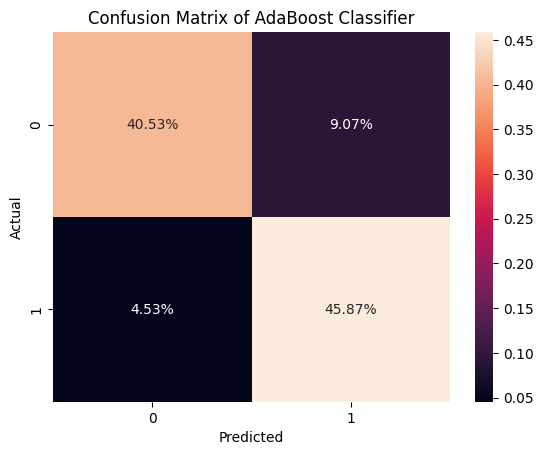

In [60]:
cf_matrix = confusion_matrix (y_test, pred_Ada)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel ('Actual')

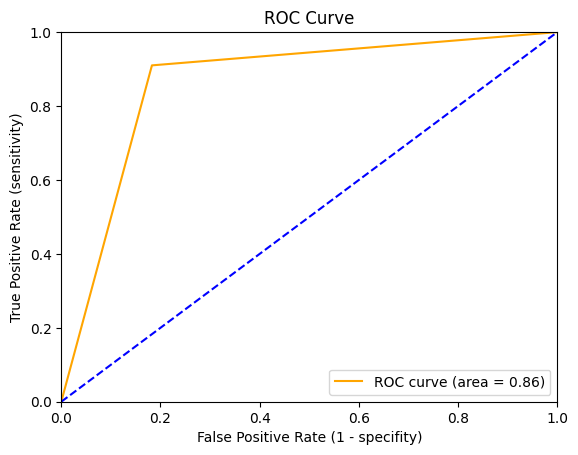

(array([0.       , 0.1827957, 1.       ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [61]:
from sklearn import metrics
fpr_Ada, tpr_Ada, thresholds_Ada = roc_curve (y_test, pred_Ada)
roc_auc_Ada = metrics.auc (fpr_Ada, tpr_Ada)
plt.plot(fpr_Ada, tpr_Ada, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_Ada)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend (loc= "lower right")
plt.show()
roc_curve (y_test, pred_Ada)

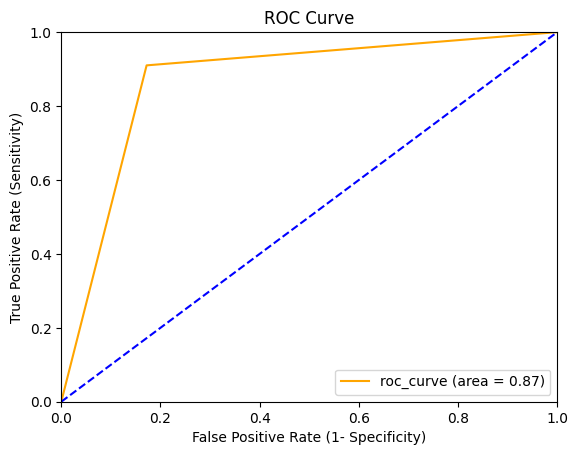

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [62]:
fpr_Ada_tuned, tpr_Ada_tuned, thresholds_Ada_tuned = roc_curve (y_test, pred_Ada_tuned) 
roc_auc_Ada_tuned =metrics.auc(fpr_Ada_tuned, tpr_Ada_tuned) 
plt.plot(fpr_Ada_tuned, tpr_Ada_tuned, color='orange', label='roc_curve (area = %0.2f)' % roc_auc_Ada_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1- Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend (loc= "lower right")
plt.show()
roc_curve (y_test, pred_Ada_tuned)

In [63]:
print(classification_report (y_test, pred_Ada))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [64]:
print(classification_report (y_test, pred_Ada_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [65]:
import pickle
pickle.dump(Ada_tuned, open('./model.pkl', 'wb'))
pickle.dump(ct, open('./ct.pkl', 'wb'))
pickle.dump(le, open('./le.pkl', 'wb'))
model=pickle.load(open('./model.pkl','rb'))